In [2]:
##############################################
# EXPLORING PERFORMANCES OF GENERATED MODELS
# We run a bunch of games to see the 
##############################################


# INITIALIZE ALL RELEVANT VARIBLES AND FUNCTIONS
import numpy as np
import matplotlib.pyplot as plt
from bipedal_walker_wrapper import BipedalWalkerAgent

ID_DIFF = 10000 # The algorithm saves a new model each 10000 training steps
NUMBER_OF_GAMES = 10 # For each model we play 10 games
NUMBER_OF_LEVELS = 3 # We have 3 difficulty levels

agent = BipedalWalkerAgent()

def set_difficulty_level(level):
    if level == 0:
        # Easy level
        agent.set_environment_type(hardcore=False, super_easy=True)
    elif level == 1:
        # Medium level
        agent.set_environment_type(hardcore=False, super_easy=False)
    elif level == 2:
        # Hard level
        agent.set_environment_type(hardcore=True, super_easy=False)
    else:
        print('Unknown difficulty level')

def evaluate_batch(difficulty_level, difficulty_train, model_ids):
    # Evaluates the models specified in the model_ids list trained on difficulty_train level
    # against the difficulty level specifies
    n_wins = 0
    n_draws = 0
    n_loss = 0
    
    set_difficulty_level(difficulty_level)
    agent.set_model_difficulty(difficulty_train)
    average_rewards = []
    win_percentage = []
    draw_percentage = []
    loss_percentage = []
    
    # Iterate over each model in the batch
    for model in model_ids:
        # Load the model
        agent.load_model(model)
        total_model_reward = 0.0
        n_wins = 0
        n_draws = 0
        n_losses = 0

        # play NUMBER_OF_GAMES time to average the results
        for i in range(NUMBER_OF_GAMES):
            outcome, reward = agent.play()
            total_model_reward += reward

            if outcome == 1:
                n_wins += 1
            elif outcome == 0:
                n_draws += 1
            else:
                n_losses +=1
                
        average_rewards.append(total_model_reward / NUMBER_OF_GAMES)
        win_percentage.append(n_wins / NUMBER_OF_GAMES)
        draw_percentage.append(n_draws / NUMBER_OF_GAMES)
        loss_percentage.append(n_losses / NUMBER_OF_GAMES)
    
    outcomes = (win_percentage, draw_percentage, loss_percentage)
    return outcomes, average_rewards

def plot_(title, data, labels = [], lim = None, filename='file', save_plots = False):
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (15, 5) # (w, h)
    
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    a1 = ax.plot(data[0])
    a2 = ax.plot(data[1])
    a3 = ax.plot(data[2])

    plt.legend((a1[0], a2[0], a3[0]), ('Easy', 'Medium', 'Hard'))
    
    if len(labels) > 0:
        x = range(len(labels))
        plt.xticks(x, labels, rotation='vertical')
    
    if lim != None:
        plt.ylim(lim[0], lim[1])
    plt.show()
    
    if save_plots:
        path = 'img/model_exploration/' + filename + '.png'
        fig.savefig(path, bbox_inches='tight')

In [2]:
##################################################
# EXPLORE MODELS TRAINED ON THE EASY ENVIRONMENT
##################################################

model_difficulty = 'easy'
number_of_models = 38
starting_model = 0
ending_model = starting_model + ID_DIFF * number_of_models
model_ids_batch = np.linspace(starting_model, ending_model, number_of_models+1, dtype=int)
easy_ids_batch = model_ids_batch

outcomes_model_easy = {}
rewards_model_easy = []

# For each difficulty level
for i in range(NUMBER_OF_LEVELS):
    print('#########################\n# PLAYING AGAINS LEVEL {}\n#########################'.format(i))
    outcomes, rewards = evaluate_batch(i, model_difficulty, model_ids_batch)
    outcomes_model_easy[i] = outcomes
    rewards_model_easy.append(rewards)

    
%store easy_ids_batch
%store rewards_model_easy
%store outcomes_model_easy
print('########### COMPUTATION COMPLETED ###########')

#########################
# PLAYING AGAINS LEVEL 0
#########################


OSError: File ./models/easy/model-0.ckpt.meta does not exist.

In [ ]:
##############################
# PLOT THE RESULTS
##############################

%store -r easy_ids_batch
%store -r rewards_model_easy
%store -r outcomes_model_easy

win_perc_easy = []
draw_perc_easy = []
loss_perc_easy = []


for i in range(NUMBER_OF_LEVELS):
    win_perc_easy.append(outcomes_model_easy[i][0])
    draw_perc_easy.append(outcomes_model_easy[i][1])
    loss_perc_easy.append(outcomes_model_easy[i][2])
    
%store win_perc_easy
%store draw_perc_easy
%store loss_perc_easy

# We expect these models to be able to solve only easy environments

plot_('Average rewards for easy models',rewards_model_easy, labels=easy_ids_batch, filename='easy/rewards')
plot_('Win percentage for easy models', win_perc_easy, labels=easy_ids_batch, lim=(-0.05,1.05), filename='easy/win')
plot_('Draw percentage for easy models', draw_perc_easy, labels=easy_ids_batch, lim=(-0.05,1.05), filename='easy/draw')
plot_('Loss percentage for easy models', loss_perc_easy, labels=easy_ids_batch, lim=(-0.05,1.05), filename='easy/loss')

In [ ]:
################################################
# EVALUATE MODELS TRAINED IN MEDIUM ENVIRONMENT
################################################

model_difficulty = 'medium'
number_of_models = 15
starting_model = 150000
ending_model = starting_model + ID_DIFF * number_of_models
model_ids_batch = np.linspace(starting_model, ending_model, number_of_models+1, dtype=int)
medium_ids_batch = model_ids_batch
%store medium_ids_batch

outcomes_model_medium = []
rewards_model_medium = []

# For each difficulty level
for i in range(NUMBER_OF_LEVELS):
    print('#########################\n# PLAYING AGAINS LEVEL {}\n#########################'.format(i))
    outcomes, rewards = evaluate_batch(i, model_difficulty, model_ids_batch)
    outcomes_model_medium.append(outcomes)
    rewards_model_medium.append(rewards)

%store rewards_model_medium
%store outcomes_model_medium
print('########### COMPUTATION COMPLETED ###########')

In [ ]:
#####################
# PLOT THE RESULTS
#####################

%store -r medium_ids_batch
%store -r rewards_model_medium
%store -r outcomes_model_medium

win_perc_medium = []
draw_perc_medium = []
loss_perc_medium = []


for i in range(NUMBER_OF_LEVELS):
    win_perc_medium.append(outcomes_model_medium[i][0])
    draw_perc_medium.append(outcomes_model_medium[i][1])
    loss_perc_medium.append(outcomes_model_medium[i][2])
    
%store win_perc_medium
%store draw_perc_medium
%store loss_perc_medium


# We expect these models to be able to solve easy and medium environments

plot_('Average rewards for medium models',rewards_model_medium, labels=medium_ids_batch, filename='medium/rewards')
plot_('Win percentage for medium models', win_perc_medium, labels=medium_ids_batch, lim=(-0.2,1.2), filename='medium/win')
plot_('Draw percentage for medium models', draw_perc_medium, labels=medium_ids_batch, lim=(-0.2,1.2), filename='medium/draw')
plot_('Loss percentage for medium models', loss_perc_medium, labels=medium_ids_batch, lim=(-0.2,1.2), filename='medium/loss')

In [ ]:
################################################
# EVALUATE MODELS TRAINED IN HARD ENVIRONMENT
################################################
model_difficulty = 'hard'
#model_ids_batch = [1530000, 1380000, 1490000, 1340000, 1460000, 1310000, 1060000, 1550000, 890000, 1400000]
number_of_models = 60
starting_model = 1000000
ending_model = starting_model + ID_DIFF * number_of_models
model_ids_batch = np.linspace(starting_model, ending_model, number_of_models+1, dtype=int)

hard_ids_batch = model_ids_batch
%store hard_ids_batch

outcomes_model_hard = []
rewards_model_hard = []

# For each difficulty level
for i in range(NUMBER_OF_LEVELS):
    print('#########################\n# PLAYING AGAINS LEVEL {}\n#########################'.format(i))
    outcomes, rewards = evaluate_batch(i, model_difficulty, model_ids_batch)
    outcomes_model_hard.append(outcomes)
    rewards_model_hard.append(rewards)

%store rewards_model_hard
%store outcomes_model_hard
print('########### COMPUTATION COMPLETED ###########')

Stored 'win_perc_hard' (list)
Stored 'draw_perc_hard' (list)
Stored 'loss_perc_hard' (list)


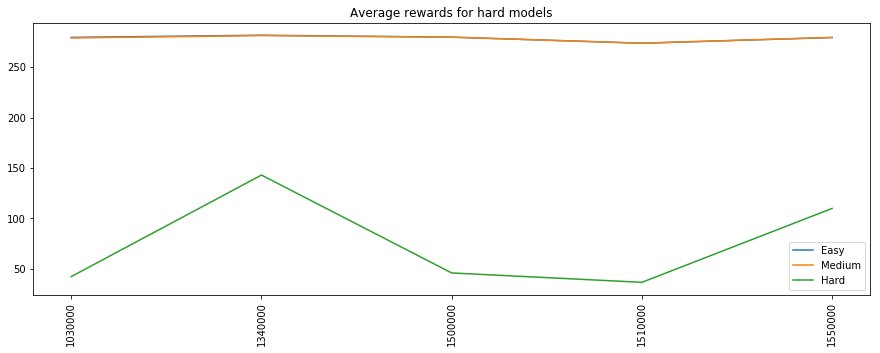

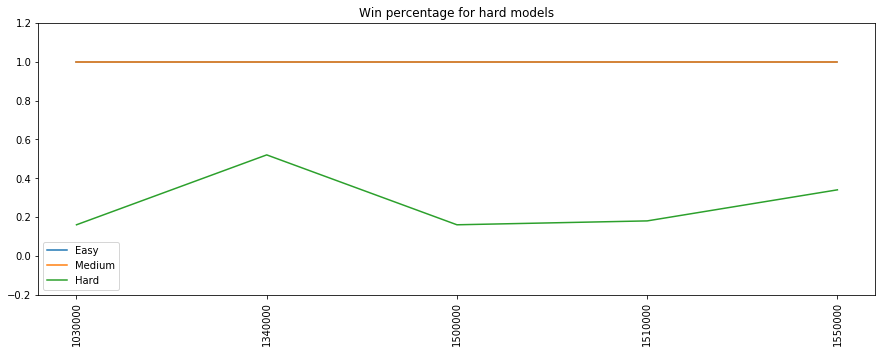

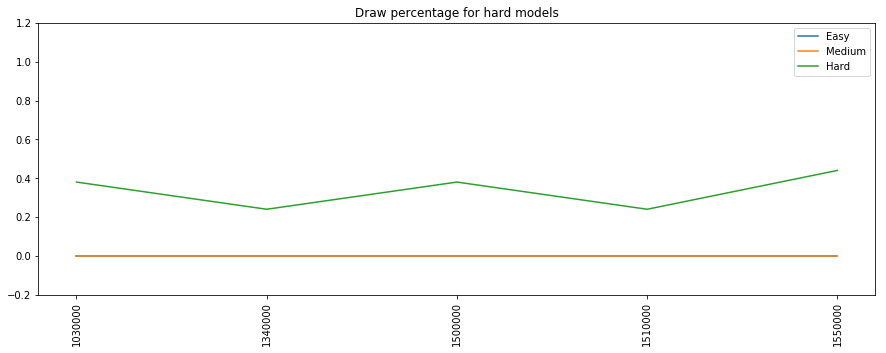

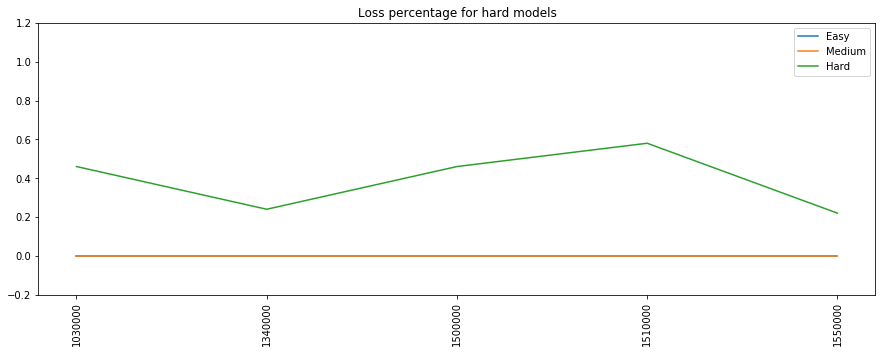

In [3]:
#####################
# PLOT THE RESULTS
#####################

%store -r hard_ids_batch
%store -r rewards_model_hard
%store -r outcomes_model_hard

win_perc_hard = []
draw_perc_hard = []
loss_perc_hard = []


for i in range(NUMBER_OF_LEVELS):
    win_perc_hard.append(outcomes_model_hard[i][0])
    draw_perc_hard.append(outcomes_model_hard[i][1])
    loss_perc_hard.append(outcomes_model_hard[i][2])
    
%store win_perc_hard
%store draw_perc_hard
%store loss_perc_hard


# We expect these models to be able to solve easy and medium environments

plot_('Average rewards for hard models',rewards_model_hard, labels=hard_ids_batch, filename='hard/rewards')
plot_('Win percentage for hard models', win_perc_hard, labels=hard_ids_batch, lim=(-0.2,1.2), filename='hard/win')
plot_('Draw percentage for hard models', draw_perc_hard, labels=hard_ids_batch, lim=(-0.2,1.2), filename='hard/draw')
plot_('Loss percentage for hard models', loss_perc_hard, labels=hard_ids_batch, lim=(-0.2,1.2), filename='hard/loss')

In [ ]:
def myFun(e):
    return e[1]

%store -r hard_ids_batch
%store -r win_perc_hard
zipped_win = []
zipped_draw = []
zipped_loss = []
for i in range(len(hard_ids_batch)):
    zipped_win.append([hard_ids_batch[i], win_perc_hard[2][i]])
    zipped_draw.append([hard_ids_batch[i], draw_perc_hard[2][i]])
    zipped_loss.append([hard_ids_batch[i], loss_perc_hard[2][i]])
    
zipped_loss.sort(reverse=True, key=myFun)
print(zipped_loss[:10])